# Train Test Splits, Cross Validation, and Linear Regression

## Introduction

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

* SalePrice: The property's sale price in dollars.


### Features

| Feature | Description |
|---|---|
| MoSold | Month Sold |
| YrSold | Year Sold |
| SaleType | Type of sale |
| SaleCondition | Condition of sale |
| MSSubClass | The building class |
| MSZoning | The general zoning classification |
| Neighborhood | Physical locations within Ames city limits |
| Street | Type of road access |
| Alley | Type of alley access |
| LotArea | Lot size in square feet |
| LotConfig | Lot configuration |
| LotFrontage | Linear feet of street connected to property |
| LotShape | General shape of property |
| LandSlope | Slope of property |
| LandContour | Flatness of the property |
| YearBuilt | Original construction date |
| YearRemodAdd | Remodel date |
| OverallQual | Overall material and finish quality |
| OverallCond | Overall condition rating |
| Utilities | Type of utilities available |
| Foundation | Type of foundation |
| Functional | Home functionality rating |
| BldgType | Type of dwelling |
| HouseStyle | Style of dwelling |
| 1stFlrSF | First Floor square feet |
| 2ndFlrSF | Second floor square feet |
| LowQualFinSF | Low quality finished square feet (all floors) |
| GrLivArea | Above grade (ground) living area square feet |
| TotRmsAbvGrd | Total rooms above grade (does not include bathrooms) |
| Condition1 | Proximity to main road or railroad |
| Condition2 | Proximity to main road or railroad (if a second is present) |
| RoofStyle | Type of roof |
| RoofMatl | Roof material |
| ExterQual | Exterior material quality |
| ExterCond | Present condition of the material on the exterior |
| Exterior1st | Exterior covering on house |
| Exterior2nd | Exterior covering on house (if more than one material) |
| MasVnrType | Masonry veneer type |
| MasVnrArea | Masonry veneer area in square feet |
| WoodDeckSF | Wood deck area in square feet |
| OpenPorchSF | Open porch area in square feet |
| EnclosedPorch | Enclosed porch area in square feet |
| 3SsnPorch | Three season porch area in square feet |
| ScreenPorch | Screen porch area in square feet |
| PoolArea | Pool area in square feet |
| PoolQC | Pool quality |
| Fence | Fence quality |
| PavedDrive | Paved driveway |
| GarageType | Garage location |
| GarageYrBlt | Year garage was built |
| GarageFinish | Interior finish of the garage |
| GarageCars | Size of garage in car capacity |
| GarageArea | Size of garage in square feet |
| GarageQual | Garage quality |
| GarageCond | Garage condition |
| Heating | Type of heating |
| HeatingQC | Heating quality and condition |
| CentralAir | Central air conditioning |
| Electrical | Electrical system |
| FullBath | Full bathrooms above grade |
| HalfBath | Half baths above grade |
| BedroomAbvGr | Number of bedrooms above basement level |
| KitchenAbvGr | Number of kitchens |
| KitchenQual | Kitchen quality |
| Fireplaces | Number of fireplaces |
| FireplaceQu | Fireplace quality |
| MiscFeature | Miscellaneous feature not covered in other categories |
| MiscVal | Value of miscellaneous feature |
| BsmtQual | Height of the basement |
| BsmtCond | General condition of the basement |
| BsmtExposure | Walkout or garden level basement walls |
| BsmtFinType1 | Quality of basement finished area |
| BsmtFinSF1 | Type 1 finished square feet |
| BsmtFinType2 | Quality of second finished area (if present) |
| BsmtFinSF2 | Type 2 finished square feet |
| BsmtUnfSF | Unfinished square feet of basement area |
| BsmtFullBath | Basement full bathrooms |
| BsmtHalfBath | Basement half bathrooms |
| TotalBsmtSF | Total square feet of basement area |

## Question 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`).
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type.

In [4]:
import pandas as pd

data_path = '../data/'
filepath = data_path + 'Ames_Housing_Sales.csv'
data = pd.read_csv(filepath, sep=',')
print(data.shape)

(1379, 80)


In [5]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
Name: count, dtype: int64

## Question 2

As discussed in the lecture, a significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly.

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [6]:
data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,NaN,3,1Fam,NaN,NaN,0.0,0.0,...,0.0,Pave,7,953.0,AllPub,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,NaN,3,1Fam,TA,No,790.0,163.0,...,0.0,Pave,7,1542.0,AllPub,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,NaN,4,1Fam,Gd,No,275.0,0.0,...,0.0,Pave,9,1152.0,AllPub,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,NaN,2,1Fam,TA,Mn,49.0,1029.0,...,0.0,Pave,5,1078.0,AllPub,366.0,1950,1996,2010,142125.0


In [7]:
# Select the object (string) columns
import numpy as np

mask = data.dtypes == object
categorical_cols = data.columns[mask]

In [8]:
categorical_cols

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [9]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped.
# This is quite a few extra columns!
small_num_ohc_cols.sum()

np.int64(204)

In [10]:
print(num_ohc_cols)
sum(num_ohc_cols)

Neighborhood     25
Exterior2nd      16
Exterior1st      14
SaleType          9
Condition1        9
RoofMatl          8
HouseStyle        8
Condition2        8
Functional        7
GarageType        6
BsmtFinType2      6
SaleCondition     6
Heating           6
Foundation        6
RoofStyle         6
HeatingQC         5
BldgType          5
BsmtFinType1      5
Electrical        5
MSZoning          5
LotConfig         5
GarageCond        5
FireplaceQu       5
GarageQual        5
BsmtExposure      4
LotShape          4
BsmtQual          4
MiscFeature       4
KitchenQual       4
ExterCond         4
Fence             4
ExterQual         4
LandContour       4
BsmtCond          3
GarageFinish      3
PavedDrive        3
PoolQC            3
MasVnrType        3
LandSlope         3
CentralAir        2
Alley             2
Street            2
Utilities         2
dtype: int64


247

In [11]:
print(small_num_ohc_cols)
small_num_ohc_cols.sum()

Neighborhood     24
Exterior2nd      15
Exterior1st      13
SaleType          8
Condition1        8
RoofMatl          7
HouseStyle        7
Condition2        7
Functional        6
GarageType        5
BsmtFinType2      5
SaleCondition     5
Heating           5
Foundation        5
RoofStyle         5
HeatingQC         4
BldgType          4
BsmtFinType1      4
Electrical        4
MSZoning          4
LotConfig         4
GarageCond        4
FireplaceQu       4
GarageQual        4
BsmtExposure      3
LotShape          3
BsmtQual          3
MiscFeature       3
KitchenQual       3
ExterCond         3
Fence             3
ExterQual         3
LandContour       3
BsmtCond          2
GarageFinish      2
PavedDrive        2
PoolQC            2
MasVnrType        2
LandSlope         2
CentralAir        1
Alley             1
Street            1
Utilities         1
dtype: int64


np.int64(204)

## Question 3

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn;s `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:

    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(int)

    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(),
                          index=data_ohc.index,
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [13]:
#Check the last OHE column
new_df

,Utilities_0,Utilities_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1374,1.0,0.0
1375,1.0,0.0
1376,1.0,0.0
1377,1.0,0.0


In [14]:
data_ohc

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,LandSlope_2,CentralAir_0,CentralAir_1,Alley_0,Alley_1,Alley_2,Street_0,Street_1,Utilities_0,Utilities_1
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [15]:
# Column difference is as calculated above
print(data_ohc.shape[1])
print(data.shape[1])
data_ohc.shape[1] - data.shape[1]

295
80


215

In [16]:
print(data.shape[1])

# Remove the string columns from the dataframe
data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

80
37


In [17]:
#Now data has only float or int columns
data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


## Question 4

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data.
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [18]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

# if you want to predict the price in log
#y_data = np.log(y_data)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc,
                                                    test_size=0.3, random_state=42)

In [19]:
#Note that ohchasmuch more columns (leads to a complex model)
X_train.shape,X_train_ohc.shape

((965, 36), (965, 294))

In [20]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()

np.True_

###Note: the errors are in log

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# the errors are in log !!!!!

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': np.log(mean_squared_error(y_train, y_train_pred)),
                           'test' : np.log(mean_squared_error(y_test,  y_test_pred))},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': np.log(mean_squared_error(y_train_ohc, y_train_ohc_pred)),
                           'test' : np.log(mean_squared_error(y_test_ohc,  y_test_ohc_pred))},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,no enc,one-hot enc
train,20.846816,19.576702
test,21.039668,22.810840


Note that the error values on the one-hot encoded data are very different for the train and test data. In particular, the errors on the test data are much higher. Based on the lecture, this is because the one-hot encoded model is overfitting the data. We will learn how to deal with issues like this in the next lesson.

## Question 5

For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.

In [22]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled.
# We're supposed to scale the original data each time
mask = X_train.dtypes == float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        # the errors are in log !!!!!
        errors[key] = np.log(mean_squared_error(_y_test, predictions))

errors = pd.Series(errors)
print(errors)

not_encoded - standardscaling        21.039668
not_encoded - minmaxscaling          21.039668
not_encoded - maxabsscaling          21.039668
one_hot_encoded - standardscaling    22.810840
one_hot_encoded - minmaxscaling      22.810840
one_hot_encoded - maxabsscaling      22.810840
dtype: float64



## Question 6

Try to combine the not-encoded and one-hot-encoded LR models, either using all features in a single model or combining the predictions? Does it improve the performance?

In [24]:
# for me


## Question 7

Plot predictions vs actual for one of the models.

Note that the linear model is not so good for predicting expensive house prices (maybe use some feature transformation as seen in the lesson slides)

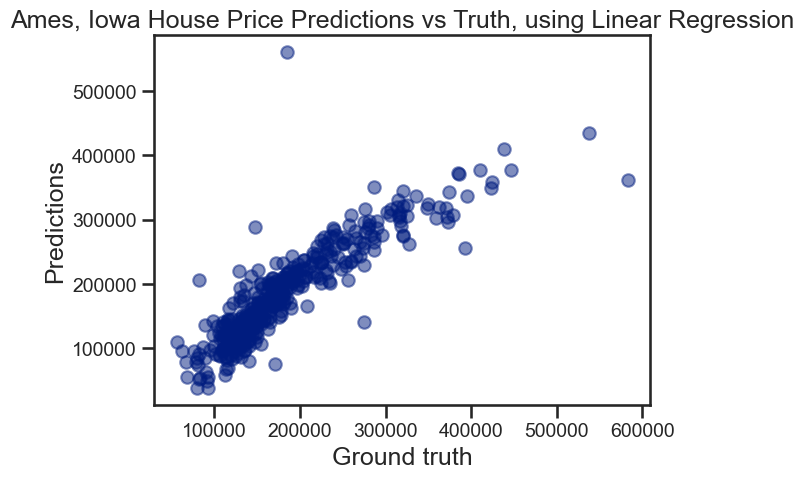

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth',
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');
ax.tick_params(labelsize=14)


## Question 8

Is this model good at all price ranges? Why? Can you improve the model adding some non-linearities? Compare LR with k-NN (plot the above curve for k-NN and compare both models)

In [26]:
# for me